0.87486758867287
0.8988372354118841
0.8080837505145423
0.8213424139104538
0.8623308361514344
0.8874529584173592
0.883813452468311
0.7993241009966334
0.8100144673345302
0.8987258870963925
0.8515503713475918
0.7358112791520266
0.8740775548051768
0.8846000906371186
0.8088674510538455
0.8804998880162886
0.8197339637906378
0.8841292778856087
0.868462507210823
0.7567424081364055
Coeficients: 
 [ 0.13256681  0.98748673 -0.19936816 -0.32171685  0.04105682]
Intercept: 
 -1.3307517315555675
-0.9814881672044412 [12  0  3  2  0] 0
7.55939491206659 [8 8 2 0 8] 6
8.483560691286202 [10  9  2  0  0] 0
6.843458010594976 [6 8 1 1 0] 8
14.130801207217443 [15 14  3  0  6] 14
10.790469137755233 [11 11  1  0  0] 10
7.688767478195324 [7 9 2 2 6] 8
10.723667788117323 [12 11  2  0  0] 12
7.098373515625719 [7 8 2 0 0] 0
13.818694806119083 [13 14  2  0  0] 15
16.32393553019513 [17 16  2  0  0] 16
19.317020326707812 [19 19  4  0  4] 20
14.938748354534644 [14 15  2  0  0] 15
7.242772231250454 [ 8  8  4  0 10] 8
17

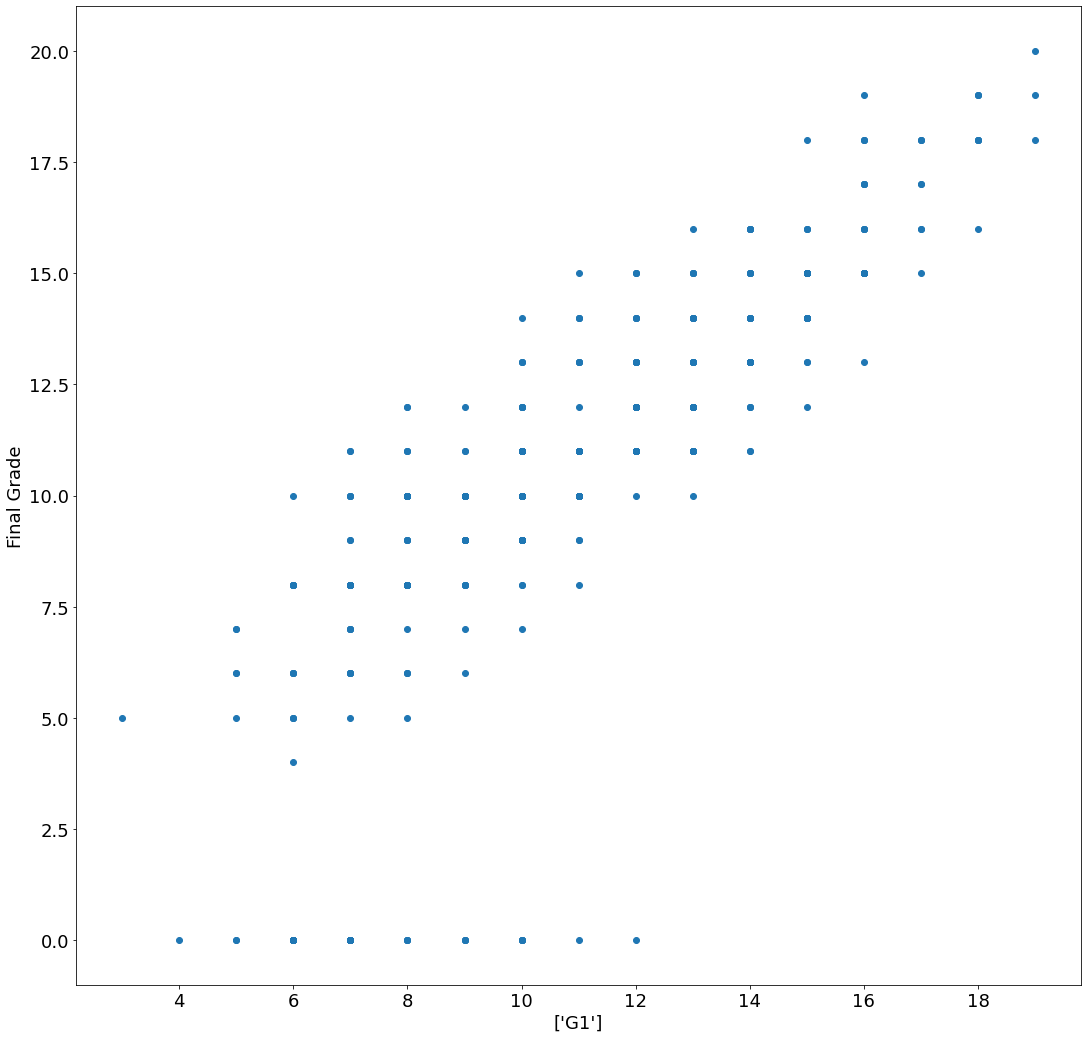

In [5]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

plt.rcParams['figure.figsize']=[18,18]
plt.rcParams.update({'font.size': 18})
#The following code is an example of linear regression for machine learning
#Using the data set from " " , the algorithm will predict the third grade "G3" based on the second, and first grade of a student 
#also using the records of hours of study, fails, and absences
data=pd.read_csv("student-mat.csv", sep= ";")
data = data [["G1" , "G2", "G3", "studytime","failures","absences"]]

predict="G3"
X = np.array(data.drop([predict], 1))
Y = np.array(data[predict])

#Split the data set to prevent overfitting 
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split( X, Y, test_size= 0.1 )


best=0

#The model will be trained using a for loop 
for _ in range (20):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split( X, Y, test_size= 0.1 )
    linear=linear_model.LinearRegression()
    linear.fit(x_train, y_train)
    acc=linear.score(x_test, y_test)
    print (acc)
    
    
    
#If the acuracy increces, this will save the model with the best one   
    if acc > best:
        best=acc
        with open("studentmodel.pickle", "wb") as f:
            pickle.dump(linear, f)

            
            pickle_in = open ("studentmodel.pickle", "rb")
linear = pickle.load(pickle_in)    

#We print the predictions and plot a regression of two given variables 
print ('Coeficients: \n', linear.coef_)
print ('Intercept: \n', linear.intercept_)

predictions = linear.predict(x_test)

for x in range (len(predictions)):
    print (predictions[x], x_test[x], y_test[x])
p=["G1"]    
plt.scatter(data[p],data["G3"])
plt.xlabel(p)
plt.ylabel("Final Grade")
plt.show()

NameError: name 'pickle' is not defined